Import all necessary libraries first

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

Concat all the tables into one and then replace all the newer values to the table using backward filling. we will add 2017 data first and then move forward looking for new values then we will replace the older one with the new ones to get latest data

In [133]:
dfs = []
for year in range(17, 24):
    df = pd.read_csv(f"FIFA{year}_official_data.csv")
    df["Year"] = year
    dfs.append(df)

combined = pd.concat(dfs, ignore_index=True)
combined = combined.sort_values(by=["ID", "Year"], ascending=[True, False])

filled = combined.groupby("ID").bfill()
filled[["ID", "Year"]] = combined[["ID", "Year"]]

latest_info = filled.drop_duplicates(subset=["ID"], keep="first")
latest_info = latest_info.sort_values(by="Special",ascending = False)
latest_info.to_csv("FIFA_official_latest.csv", index=False)

Reading the latest table and interpreting the data

In [134]:
df = pd.read_csv("FIFA_official_latest.csv")
df.head()

/tmp/ipython-input-1338101946.py:1: DtypeWarning: Columns (61) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("FIFA_official_latest.csv")


,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Year,Release Clause,DefensiveAwareness,Kit Number,ID
0,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,€91M,...,15.0,11.0,9.0,CM,87.0,23,€157M,74.0,8.0,209658
1,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,€78.5M,...,15.0,8.0,14.0,CAM,88.0,23,€155M,72.0,8.0,212198
2,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,€107.5M,...,5.0,10.0,13.0,CM,91.0,23,€198.9M,68.0,17.0,192985
3,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,€46.5M,...,13.0,13.0,14.0,LB,84.0,23,€97.7M,80.0,19.0,224334
4,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,€89.5M,...,13.0,14.0,11.0,CM,87.0,23,€154.4M,74.0,23.0,224232


In [135]:
df.shape

(43646, 67)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43646 entries, 0 to 43645
Data columns (total 67 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      43646 non-null  object 
 1   Age                       43646 non-null  int64  
 2   Photo                     43646 non-null  object 
 3   Nationality               43646 non-null  object 
 4   Flag                      43646 non-null  object 
 5   Overall                   43646 non-null  int64  
 6   Potential                 43646 non-null  int64  
 7   Club                      43174 non-null  object 
 8   Club Logo                 43646 non-null  object 
 9   Value                     43646 non-null  object 
 10  Wage                      43646 non-null  object 
 11  Special                   43646 non-null  int64  
 12  Preferred Foot            43646 non-null  object 
 13  International Reputation  43646 non-null  float64
 14  Weak F

In [137]:
df.describe()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Year,DefensiveAwareness,Kit Number,ID
count,43646.000000,43646.000000,43646.000000,43646.000000,43646.000000,43646.000000,43646.000000,35798.000000,35829.000000,35829.000000,...,35746.000000,35829.000000,35829.000000,35829.000000,35829.000000,35829.000000,43646.000000,22946.000000,17625.000000,43646.000000
mean,24.781721,63.739839,69.399006,1545.859987,1.080603,2.897539,2.284035,21.957651,48.715035,45.010522,...,44.560594,16.304083,16.119568,16.079852,16.123531,16.402356,21.253906,46.269372,25.037957,227322.311735
std,5.083366,6.925549,5.767704,271.352063,0.338348,0.655822,0.731809,18.134898,17.825941,19.275015,...,20.666465,17.111450,16.468553,16.252515,16.586644,17.365933,2.004967,20.027255,19.154116,38074.639242
min,15.000000,28.000000,38.000000,571.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,...,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,3.000000,1.000000,2.000000
25%,21.000000,59.000000,65.000000,1405.000000,1.000000,3.000000,2.000000,9.000000,37.000000,30.000000,...,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000,20.000000,29.000000,11.000000,211014.750000
50%,24.000000,64.000000,69.000000,1575.000000,1.000000,3.000000,2.000000,19.000000,53.000000,49.000000,...,51.000000,11.000000,11.000000,11.000000,11.000000,11.000000,22.000000,51.000000,22.000000,236032.000000
75%,28.000000,68.000000,73.000000,1734.000000,1.000000,3.000000,3.000000,29.000000,62.000000,61.000000,...,62.000000,14.000000,14.000000,14.000000,14.000000,14.000000,23.000000,63.000000,32.000000,254269.750000
max,54.000000,91.000000,95.000000,2312.000000,5.000000,5.000000,5.000000,99.000000,94.000000,95.000000,...,95.000000,91.000000,92.000000,93.000000,93.000000,90.000000,23.000000,93.000000,99.000000,271340.000000


In [138]:
#looking for null value rows
df.isnull().sum()

,0
Name,0
Age,0
Photo,0
Nationality,0
Flag,0
...,...
Year,0
Release Clause,5243
DefensiveAwareness,20700
Kit Number,26021


In [139]:
# checking the percentage wise most missing data
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage.sort_values(ascending=False)

,0
Loaned From,86.518810
Kit Number,59.618293
DefensiveAwareness,47.427027
Marking,35.469459
Composure,19.518398
...,...
Preferred Foot,0.000000
Weak Foot,0.000000
International Reputation,0.000000
Year,0.000000


In [140]:
# droping all the rows that are greater than 50%
df.drop(['Loaned From','Kit Number','Real Face'],axis=1,inplace = True)

In [141]:
#removing all the html tags and converting all the numeric values like wage value height etc to float and numberic form
import re
columns_to_clean = ['Best Overall Rating','Position','Best Position']
for column in columns_to_clean:
    df[column] = df[column].apply(lambda x: re.sub(r'<.*?>', '', str(x)))

def currency_to_number(x):
    if isinstance(x, str):
        x = x.replace('€', '').replace(',', '')  # remove £ and commas
        if 'M' in x:
            return float(x.replace('M', '')) * 1000000
        elif 'K' in x:
            return float(x.replace('K', '')) * 1000
        else:
            return float(x)
    return x

columns_to_convert = ['Value', 'Wage','Release Clause']
for column in columns_to_convert:
    df[column] = df[column].apply(currency_to_number)

def convert_height(height):
    if isinstance(height, str):
        if "'" in height: # Feet and inches
            feet, inches = height.split("'")
            if '"' in inches:
                inches = inches.replace('"', '')
            return (int(feet) * 12 + int(inches)) * 2.54 # Convert to cm
        elif 'cm' in height:
            return float(height.replace('cm', '').strip()) # Already in cm
    return height

def convert_weight(weight):
    if isinstance(weight, str):
        if 'lbs' in weight:
            return float(weight.replace('lbs', '').strip()) * 0.453592 # Convert to kg
        elif 'kg' in weight:
            return float(weight.replace('kg', '').strip()) # Already in kg
    return weight


df['Height'] = df['Height'].apply(convert_height)
df['Weight'] = df['Weight'].apply(convert_weight)
df['Best Overall Rating'] = df['Best Overall Rating'].astype(float)


In [142]:
#removing rows if more than 50% of data is missing
threshold = len(df.columns) * 0.5   # 50% of total columns
df = df.dropna(thresh=threshold)

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35829 entries, 0 to 43645
Data columns (total 64 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      35829 non-null  object 
 1   Age                       35829 non-null  int64  
 2   Photo                     35829 non-null  object 
 3   Nationality               35829 non-null  object 
 4   Flag                      35829 non-null  object 
 5   Overall                   35829 non-null  int64  
 6   Potential                 35829 non-null  int64  
 7   Club                      35435 non-null  object 
 8   Club Logo                 35829 non-null  object 
 9   Value                     35829 non-null  float64
 10  Wage                      35829 non-null  float64
 11  Special                   35829 non-null  int64  
 12  Preferred Foot            35829 non-null  object 
 13  International Reputation  35829 non-null  float64
 14  Weak Foot  

VISUALISING FEATURES

/tmp/ipython-input-1811650766.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df[column].value_counts().head(10).values, x=df[column].value_counts().head(10).index, palette="viridis")


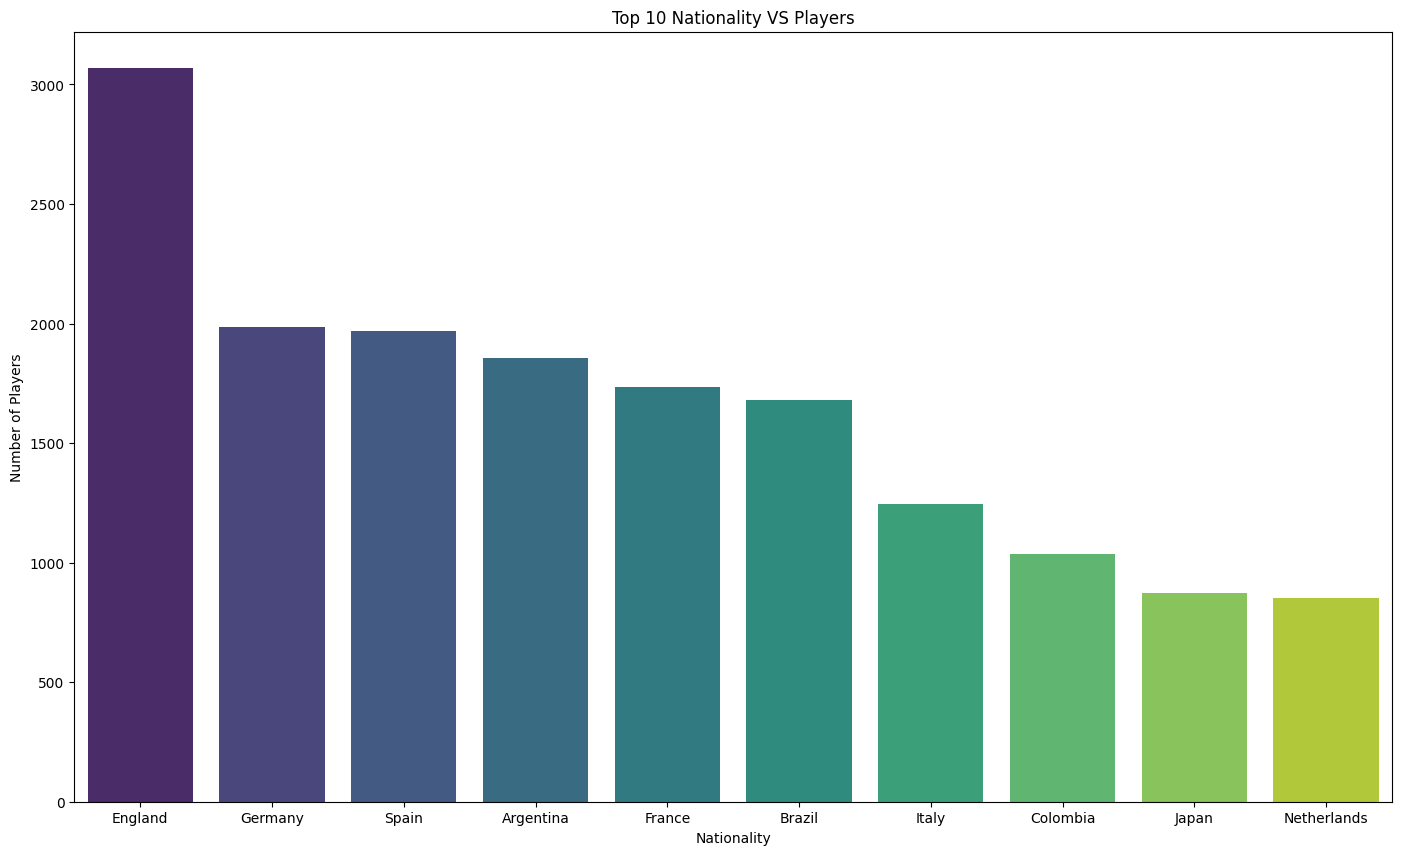

/tmp/ipython-input-1811650766.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df[column].value_counts().head(10).values, x=df[column].value_counts().head(10).index, palette="viridis")


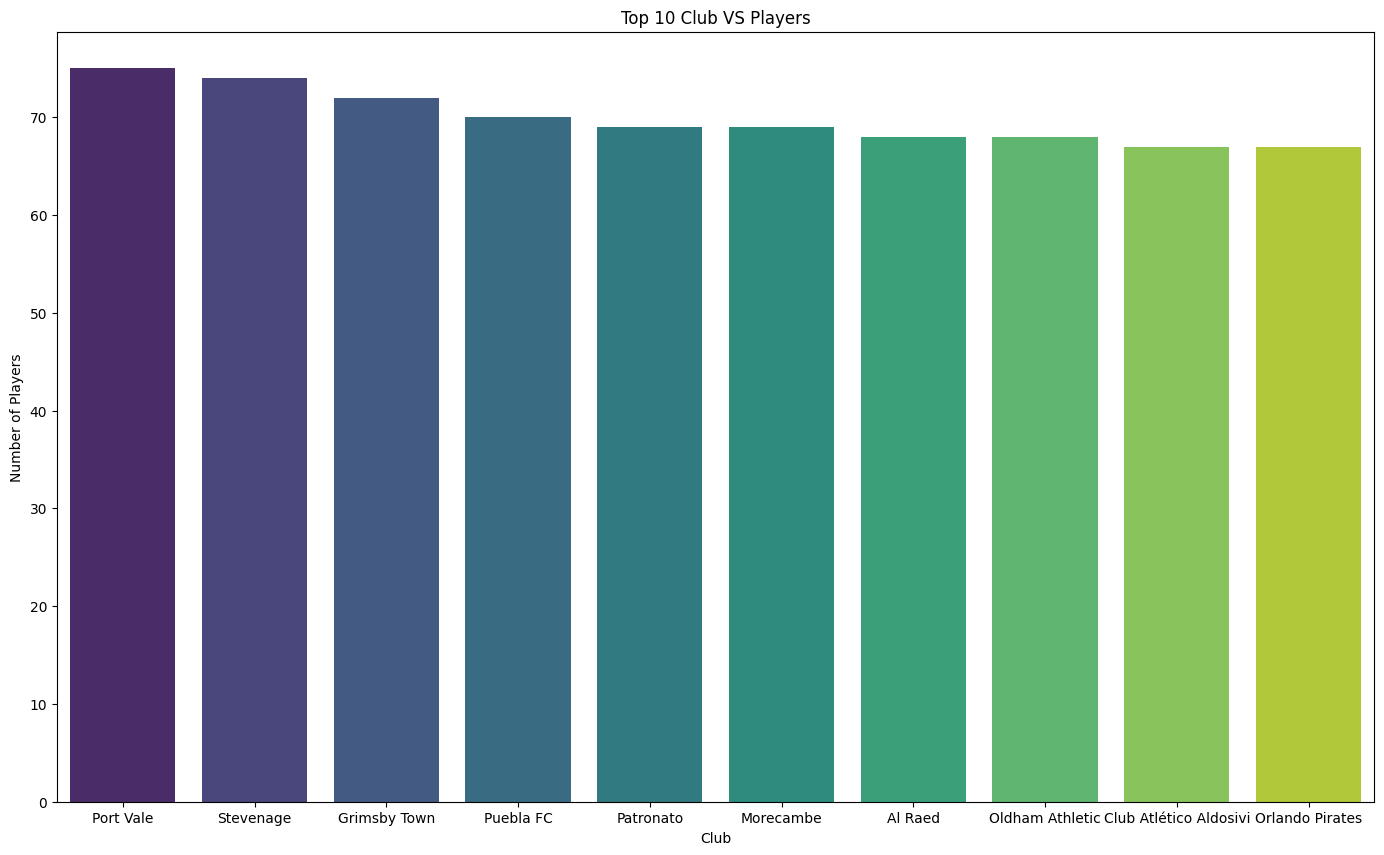

/tmp/ipython-input-1811650766.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df[column].value_counts().head(10).values, x=df[column].value_counts().head(10).index, palette="viridis")


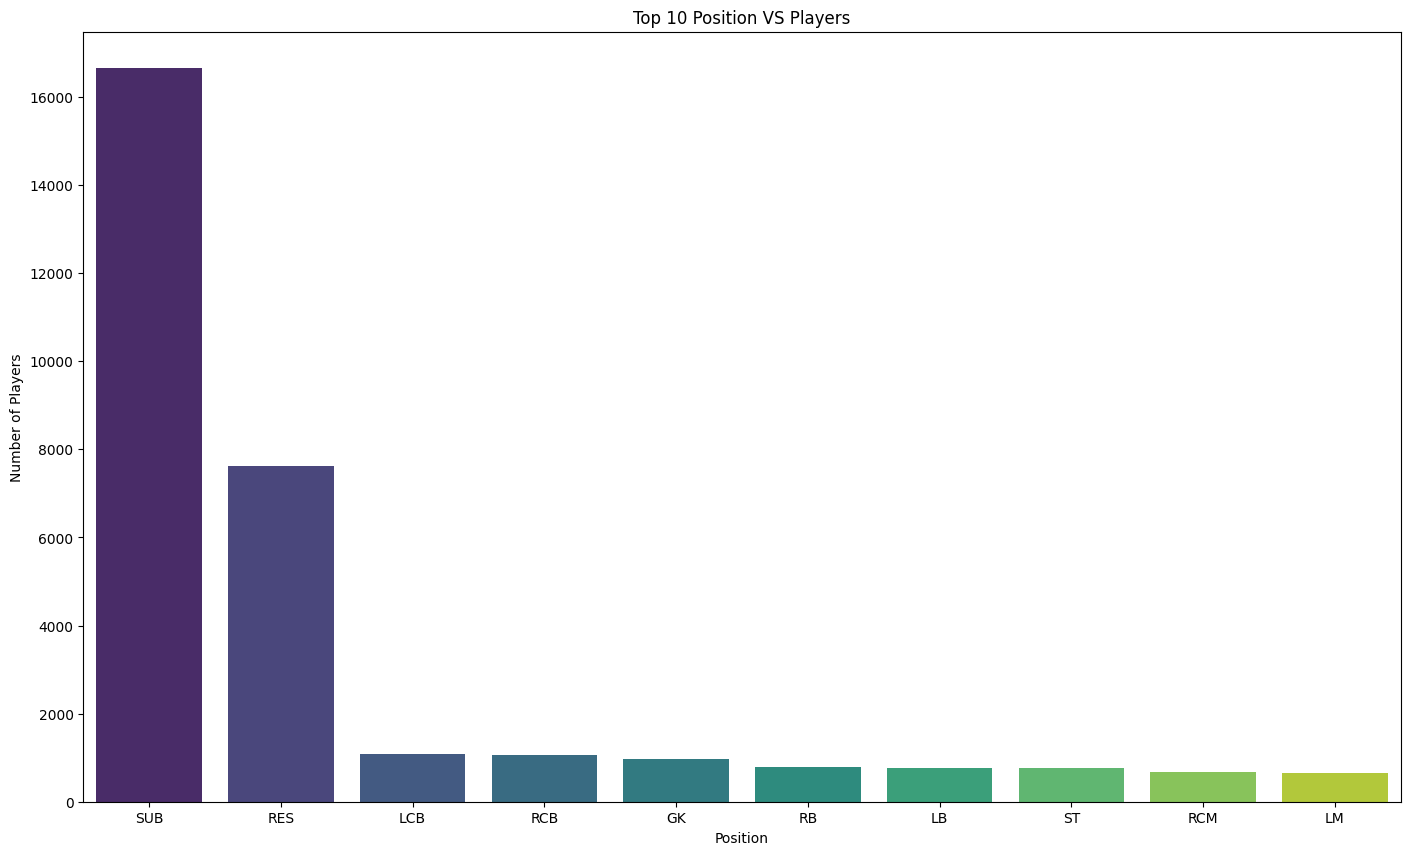

/tmp/ipython-input-1811650766.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df[column].value_counts().head(10).values, x=df[column].value_counts().head(10).index, palette="viridis")


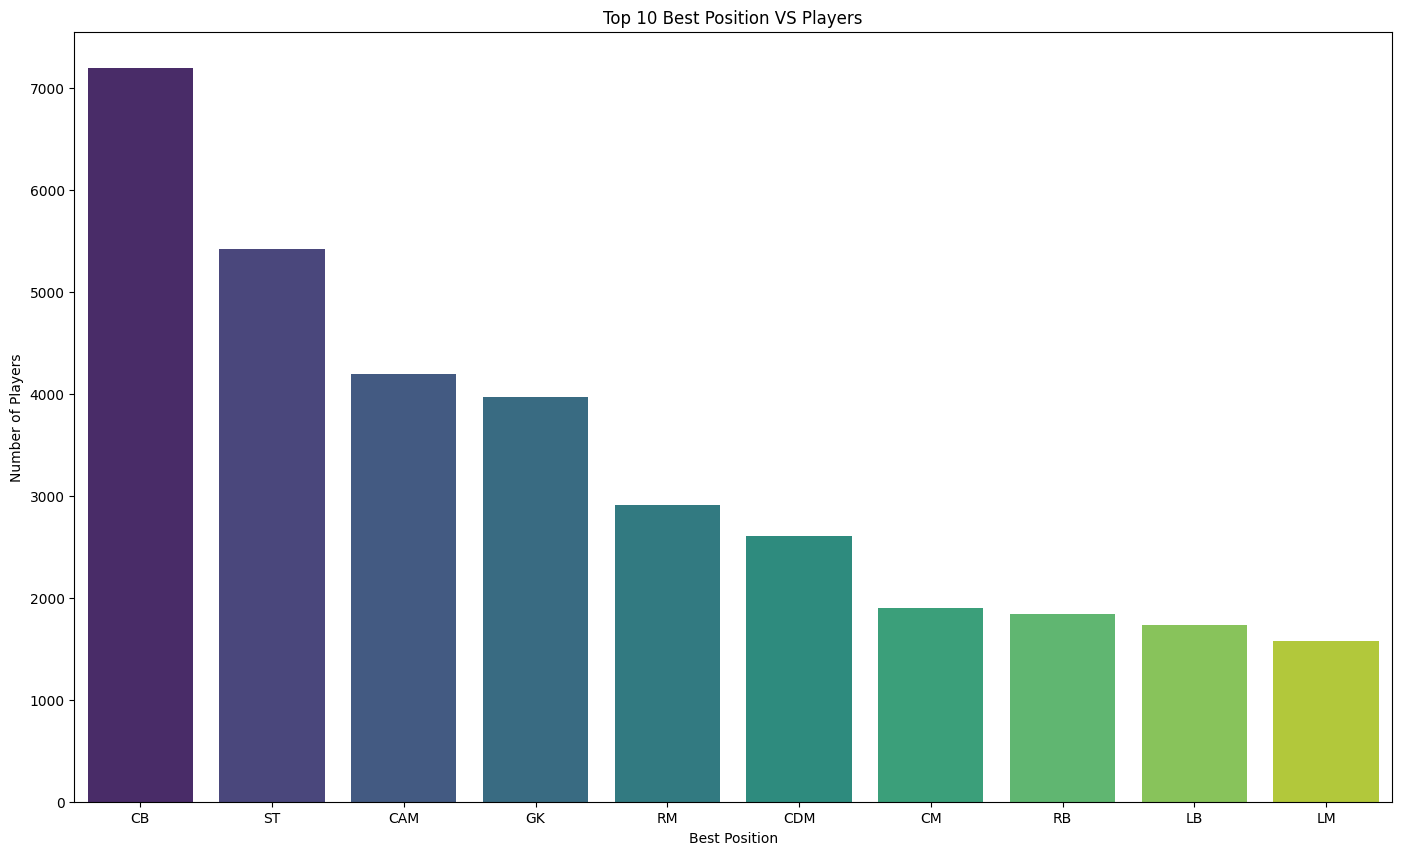

In [144]:
# frequency distribution of all parameters
frequency = ['Nationality','Club','Position','Best Position']
for column in frequency:
  plt.figure(figsize=(17,10))
  sns.barplot(y=df[column].value_counts().head(10).values, x=df[column].value_counts().head(10).index, palette="viridis")
  plt.title(f"Top 10 {column} VS Players")
  plt.ylabel("Number of Players")
  plt.xlabel(column)
  plt.show()

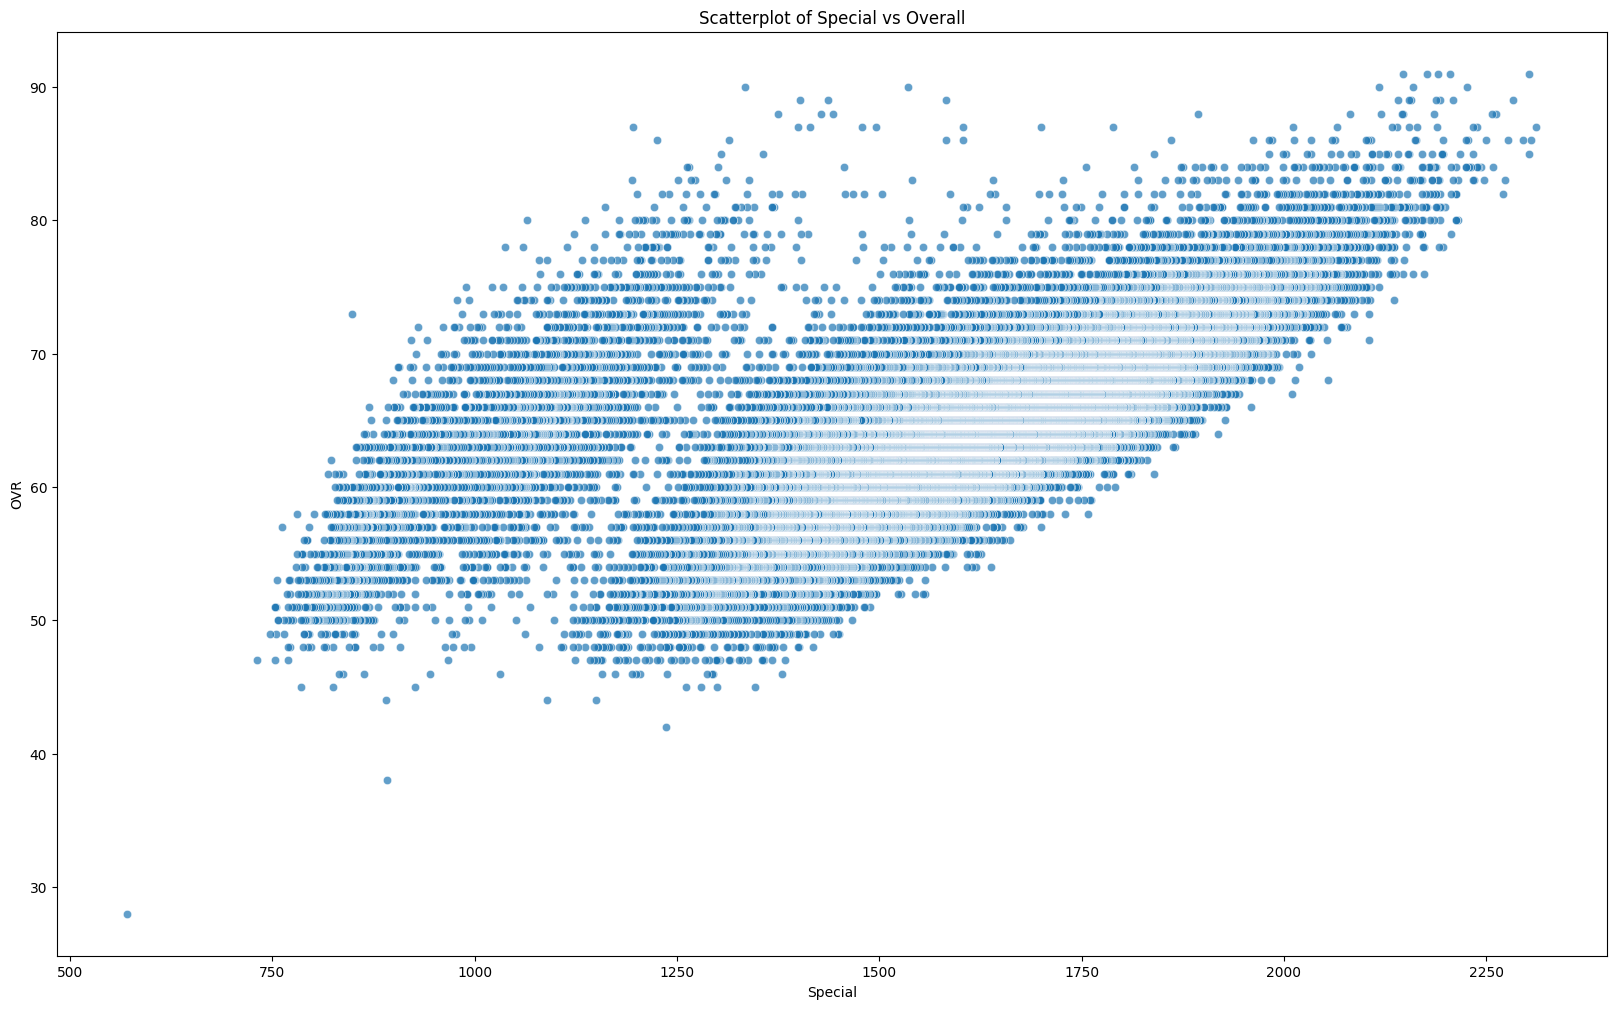

In [145]:
plt.figure(figsize=(20,12))
sns.scatterplot(data=df, x="Special", y="Overall", alpha=0.7)

plt.title("Scatterplot of Special vs Overall")
plt.xlabel("Special")
plt.ylabel("OVR")
plt.show()

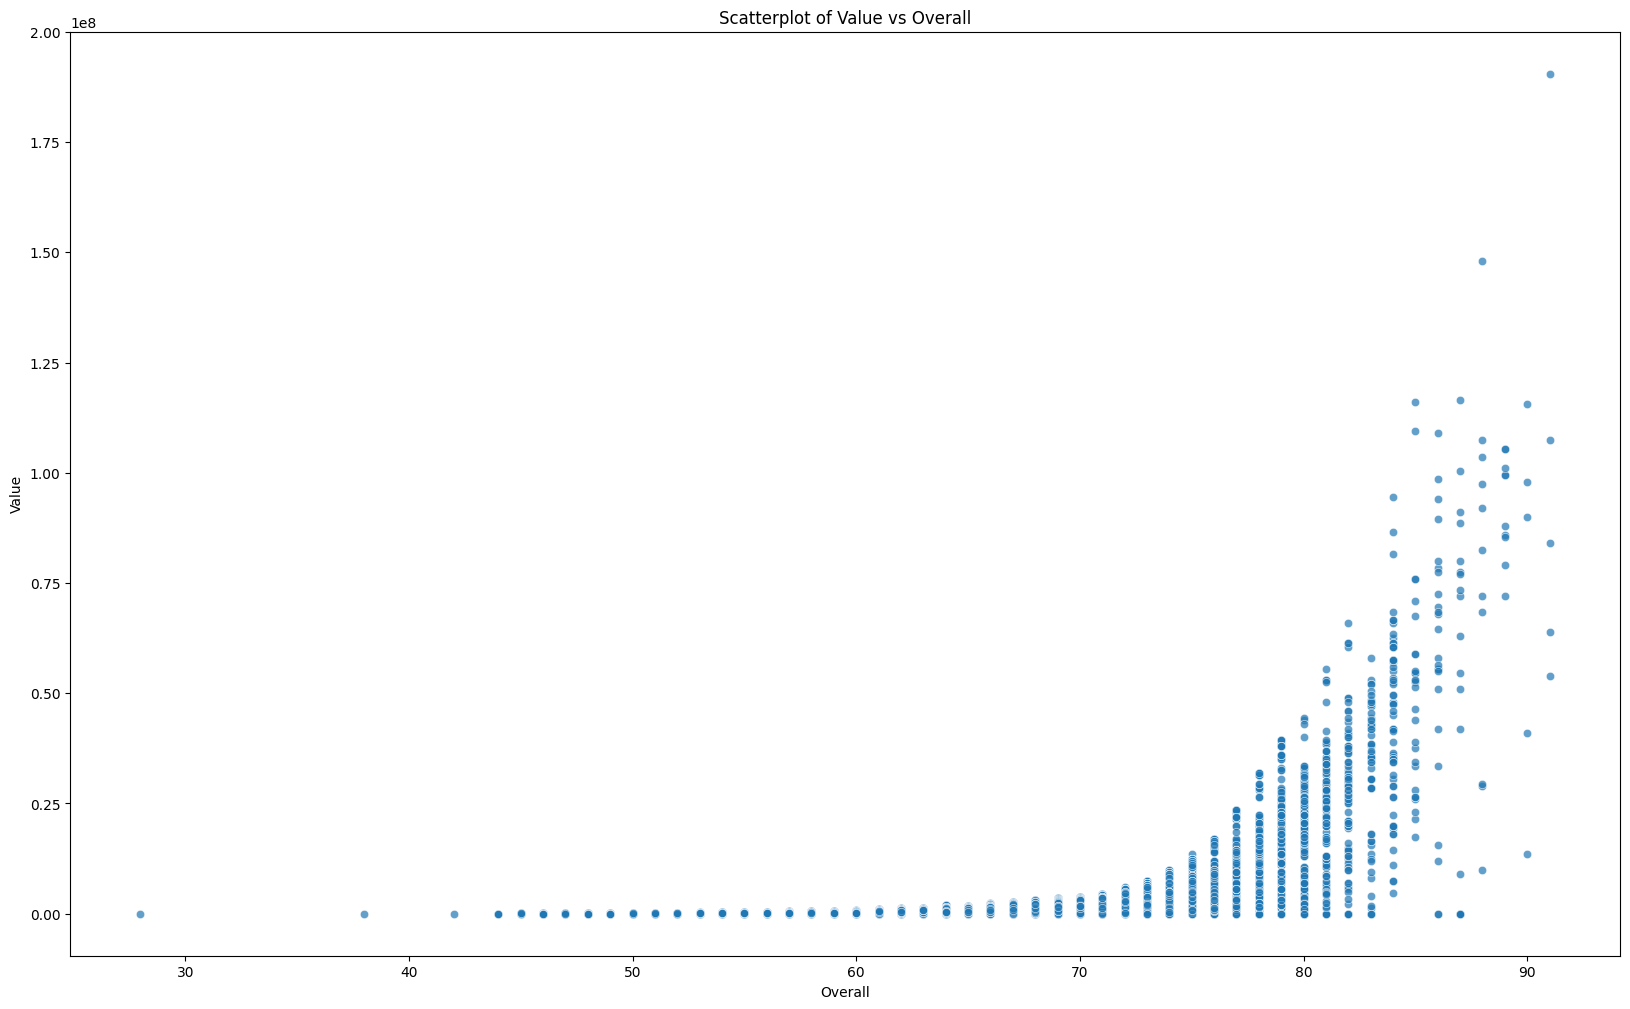

In [146]:
plt.figure(figsize=(20,12))
sns.scatterplot(data=df, x="Overall", y="Value", alpha=0.7)

plt.title("Scatterplot of Value vs Overall")
plt.xlabel("Overall")
plt.ylabel("Value")
plt.show()

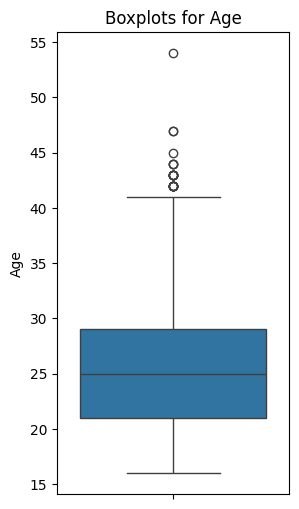

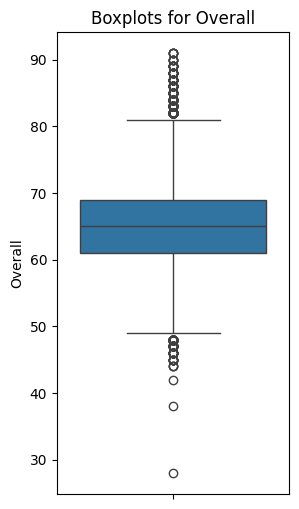

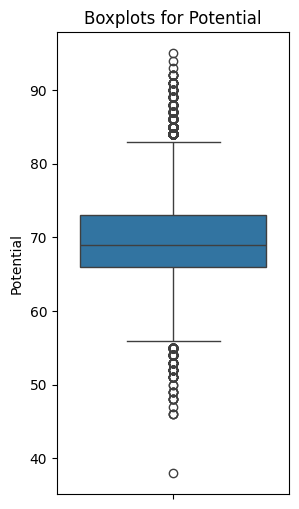

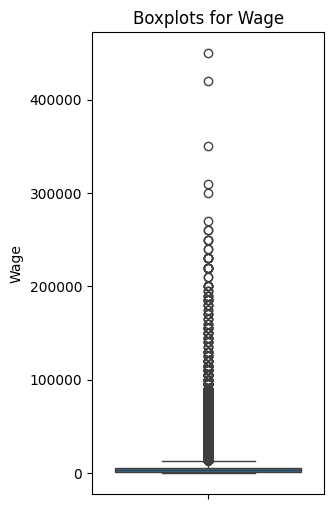

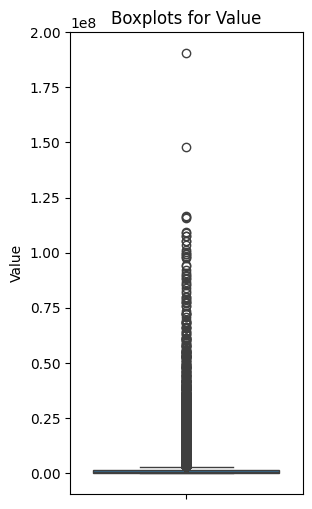

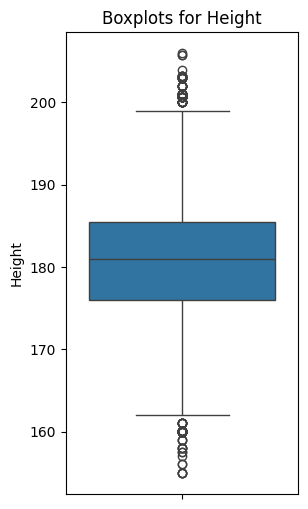

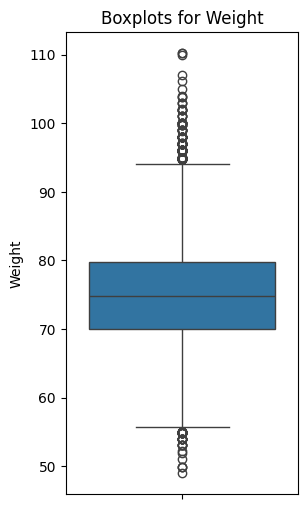

In [147]:
# Select numeric columns you want
numeric_cols = ['Age', 'Overall', 'Potential', 'Wage', 'Value','Height','Weight']
for cols in numeric_cols:
  plt.figure(figsize=(3,6))
  sns.boxplot(y = df[cols])
  plt.title(f"Boxplots for {cols}")
  plt.xticks(rotation=45)
  plt.show()

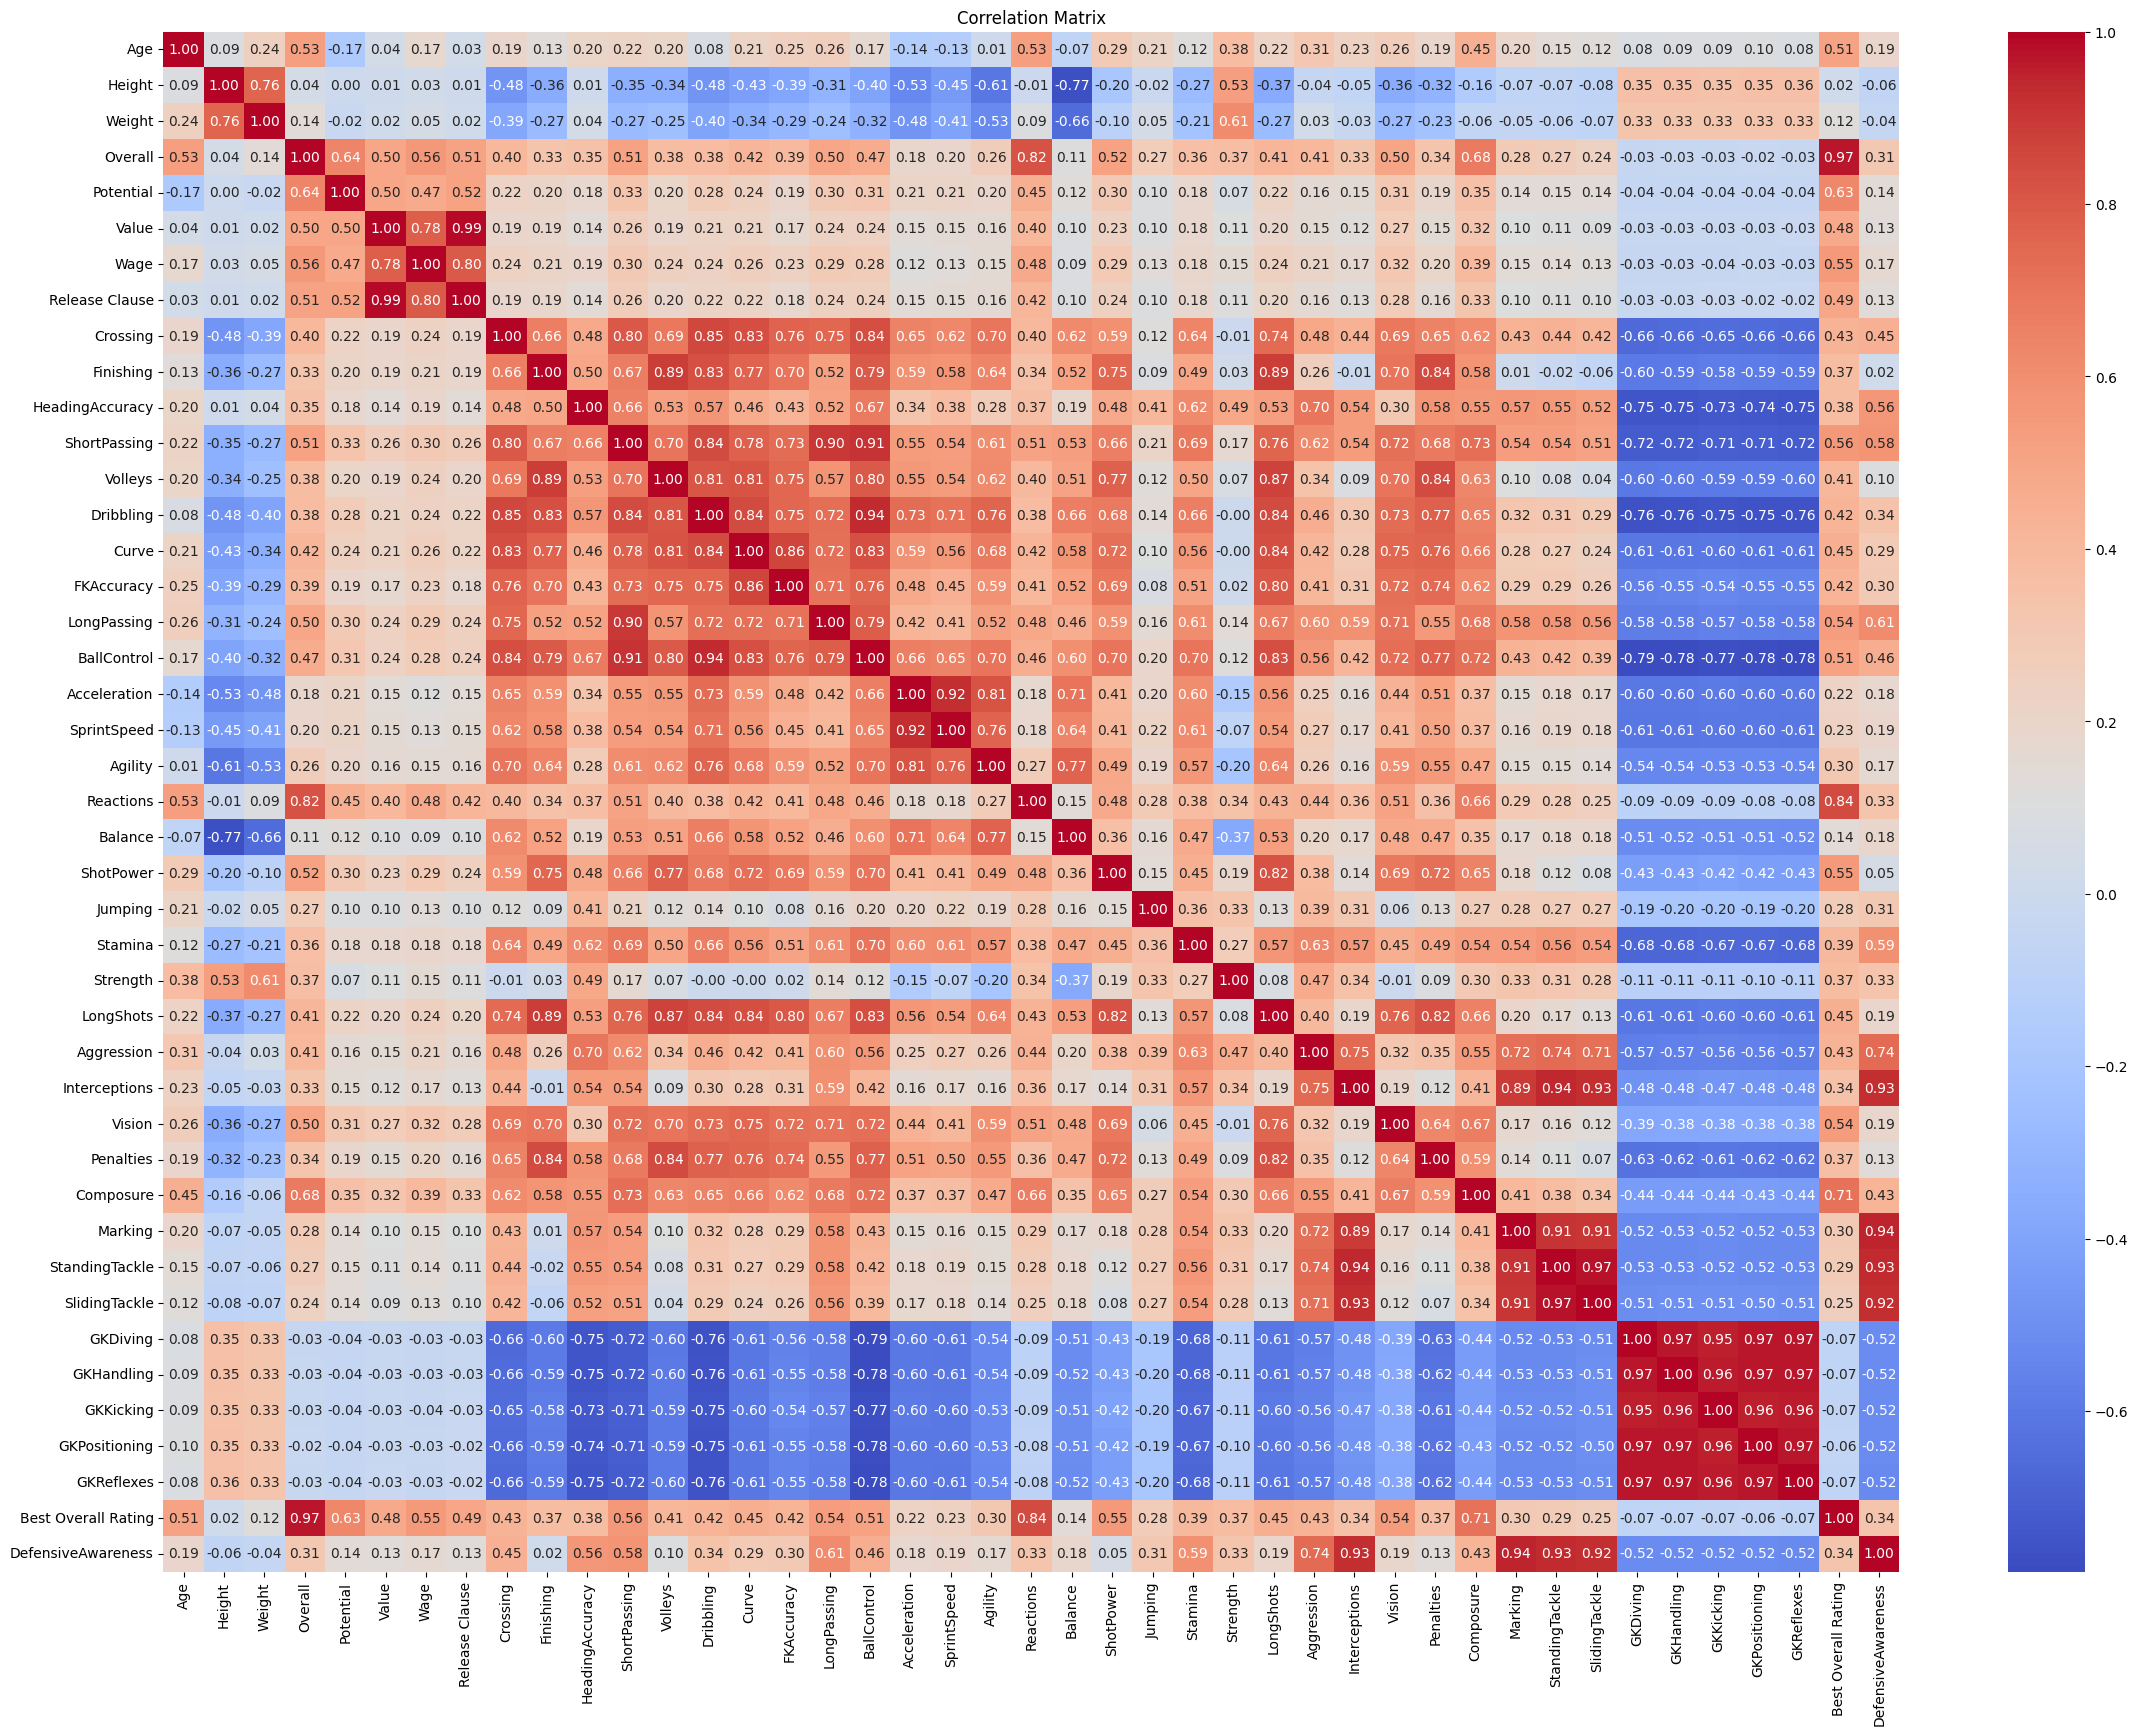

In [148]:
cols = ['Age','Height','Weight','Overall', 'Potential', 'Value', 'Wage', 'Release Clause',
           'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
           'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
           'BallControl', 'Acceleration', 'SprintSpeed','Agility',
        'Reactions','Balance','ShotPower','Jumping','Stamina', 'Strength',
        'LongShots','Aggression','Interceptions','Vision','Penalties',
        'Composure','Marking','StandingTackle','SlidingTackle','GKDiving',
        'GKHandling','GKKicking','GKPositioning','GKReflexes','Best Overall Rating',
        'DefensiveAwareness']

# Create correlation matrix
corr = df[cols].corr()

plt.figure(figsize=(28,20))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Feature Engineering

In [149]:
#There are many values that are correlated now reconstructing them as a group
df['AttackingScore'] = df[['Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys']].mean(axis=1)

df['Skill'] = df[['Dribbling','Curve','FKAccuracy','LongPassing','BallControl']].mean(axis=1)

df['Movement'] = df[['Acceleration','SprintSpeed','Agility','Reactions','Balance']].mean(axis=1)

df['PowerScore'] = df[['ShotPower','Jumping','Stamina','Strength','LongShots']].mean(axis=1)

df['Mentality'] = df[['Aggression','Interceptions','Positioning','Vision','Penalties','Composure']].mean(axis=1)

df['DefStats'] = df[['Marking','StandingTackle','SlidingTackle']].mean(axis=1)

df['GKStats'] = df[['GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes']].mean(axis=1)

df['PhysicalStrength'] = df[['Acceleration','SprintSpeed','Strength','Stamina','Jumping']].mean(axis=1)

df['BMI'] = df['Weight'] / ((df['Height']/100) ** 2)

to_drop = ['Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys',
           'Dribbling','Curve','FKAccuracy','LongPassing','BallControl',
           'Acceleration','SprintSpeed','Agility','Reactions','Balance',
           'ShotPower','Jumping','Stamina','Strength','LongShots',
           'Aggression','Interceptions','Positioning','Vision','Penalties','Composure',
           'Marking','StandingTackle','SlidingTackle',
           'GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes',
           'Height','Weight']

df = df.drop(columns=to_drop)

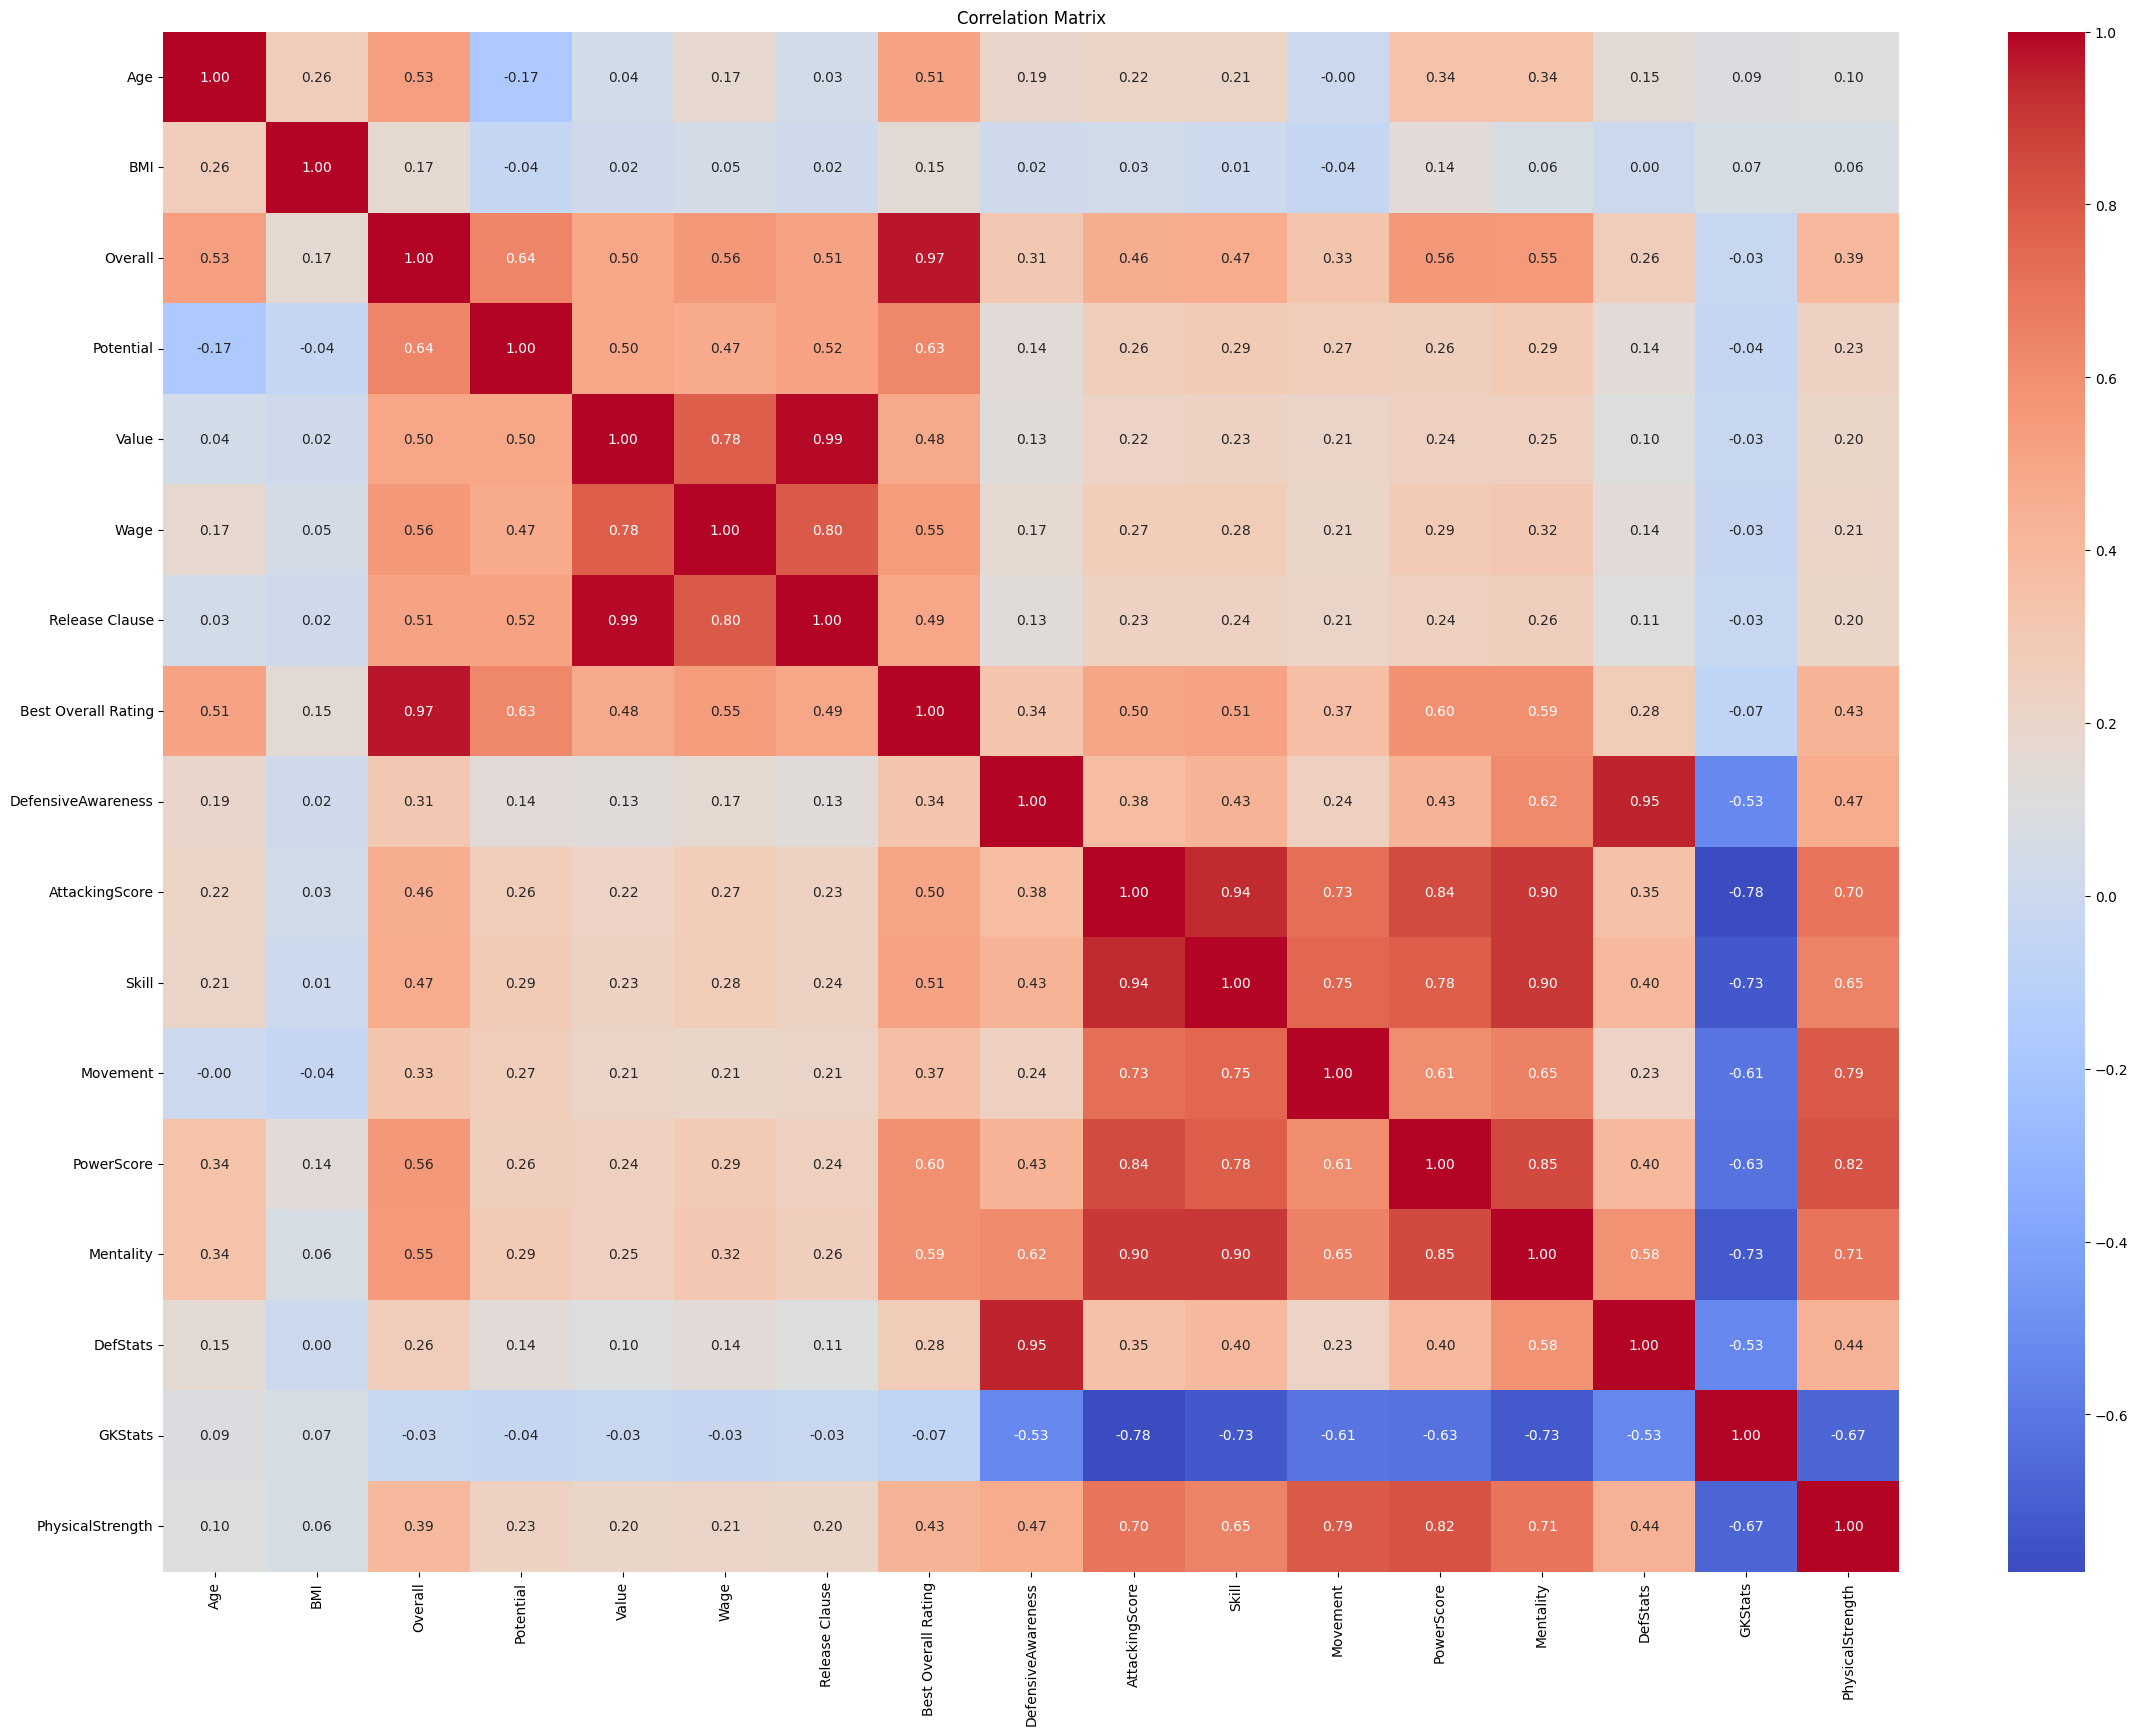

In [150]:
cols =['Age','BMI', 'Overall', 'Potential', 'Value', 'Wage', 'Release Clause','Best Overall Rating',
        'DefensiveAwareness','AttackingScore','Skill','Movement','PowerScore','Mentality',
       'DefStats','GKStats','PhysicalStrength']
corr = df[cols].corr()

plt.figure(figsize=(28,20))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Label and Encoding

In [151]:
#Checking for all the unique attributes in imp features
for column in ['Preferred Foot','Body Type','Best Position']:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'Preferred Foot': ['Right' 'Left']
Unique values in column 'Body Type': ['Unique' 'Stocky (170-185)' 'Normal (170-)' 'Normal (170-185)'
 'Stocky (185+)' 'Lean (185+)' 'Lean (170-185)' 'Normal (185+)'
 'Stocky (170-)' 'Lean (170-)' nan]
Unique values in column 'Best Position': ['CM' 'CAM' 'LB' 'CDM' 'CB' 'RB' 'LM' 'ST' 'RW' 'RWB' 'CF' 'LWB' 'LW' 'RM'
 'GK' 'LF' 'SW']


In [152]:
# converting entries to simple form
df['Body Type'] = df['Body Type'].str.extract(r'^(\S+)')

In [153]:
for column in ['Preferred Foot','Body Type','Best Position']:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'Preferred Foot': ['Right' 'Left']
Unique values in column 'Body Type': ['Unique' 'Stocky' 'Normal' 'Lean' nan]
Unique values in column 'Best Position': ['CM' 'CAM' 'LB' 'CDM' 'CB' 'RB' 'LM' 'ST' 'RW' 'RWB' 'CF' 'LWB' 'LW' 'RM'
 'GK' 'LF' 'SW']


In [154]:
# Doing labeling and Encoding
# Preferred Foot
df['Preferred Foot'] = df['Preferred Foot'].map({'Left':0, 'Right':1})

# Work Rate
df[['AttackingWorkRate','DefensiveWorkRate']] = df['Work Rate'].str.split('/ ', expand=True)
mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df['AttackingWorkRate'] = df['AttackingWorkRate'].map(mapping)
df['DefensiveWorkRate'] = df['DefensiveWorkRate'].map(mapping)


# Body Type
df['Body Type'] = df['Body Type'].replace({
    'nan': 'Normal',
    'Unique' : 'Normal',
})

body_mapping = {'Lean': 0, 'Normal': 1, 'Stocky': 2}
df['Body Type'] = df['Body Type'].map(body_mapping)

all_positions = [
    "GK", "CB", "LB", "RB", "LWB", "RWB",
    "CDM", "CM", "CAM", "LM", "RM",
    "LW", "RW", "CF", "ST"
]
# Split multiple positions into list
df['BestPositionList'] = df['Best Position'].str.split(',')


# --- One-hot for Best Position ---
for pos in all_positions:
    df[f'BestPos_{pos}'] = df['BestPositionList'].apply(lambda x: int(pos in x if isinstance(x, list) else pos == x))

df.drop(['Position', 'Best Position','BestPositionList','Work Rate','Body Type','Preferred Foot'], axis=1, inplace=True)

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35829 entries, 0 to 43645
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      35829 non-null  object 
 1   Age                       35829 non-null  int64  
 2   Photo                     35829 non-null  object 
 3   Nationality               35829 non-null  object 
 4   Flag                      35829 non-null  object 
 5   Overall                   35829 non-null  int64  
 6   Potential                 35829 non-null  int64  
 7   Club                      35435 non-null  object 
 8   Club Logo                 35829 non-null  object 
 9   Value                     35829 non-null  float64
 10  Wage                      35829 non-null  float64
 11  Special                   35829 non-null  int64  
 12  International Reputation  35829 non-null  float64
 13  Weak Foot                 35829 non-null  float64
 14  Skill Moves

Outlier Detection and Cleaning using IQR method

In [156]:
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 2.5 * IQR
    upper = Q3 + 2.5 * IQR
    return np.clip(series, lower, upper)

# Apply only to numeric features
num_cols = df.select_dtypes(include=['int64','float64']).columns
df[num_cols] = df[num_cols].apply(cap_outliers)
df = df.dropna(thresh=df.shape[1] * 0.6, axis=0)

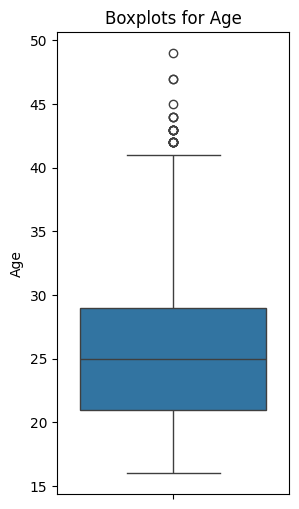

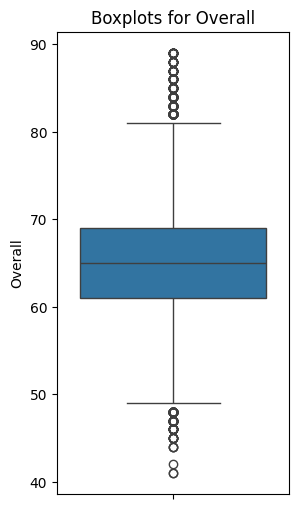

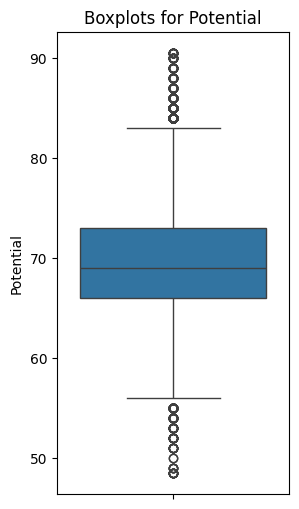

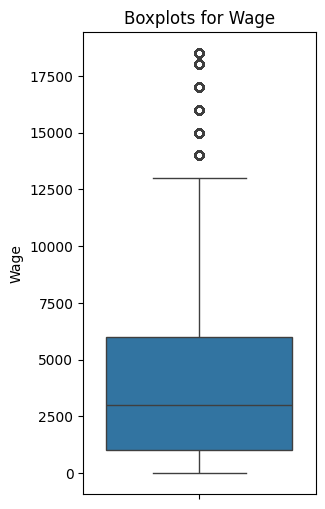

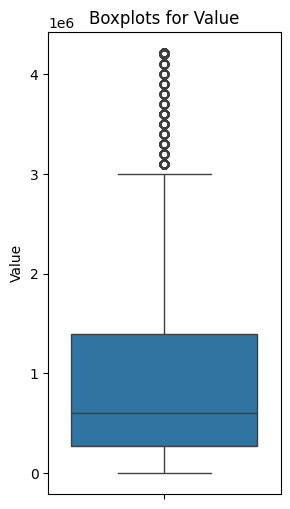

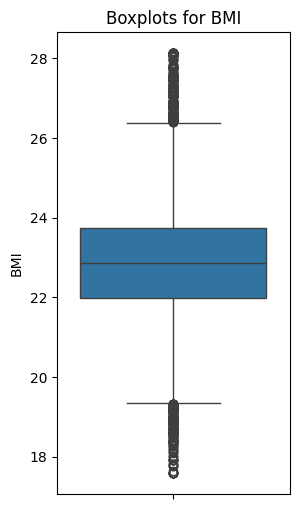

In [157]:
numeric_cols = ['Age', 'Overall', 'Potential', 'Wage', 'Value','BMI']
for cols in numeric_cols:
  plt.figure(figsize=(3,6))
  sns.boxplot(y = df[cols])
  plt.title(f"Boxplots for {cols}")
  plt.xticks(rotation=45)
  plt.show()

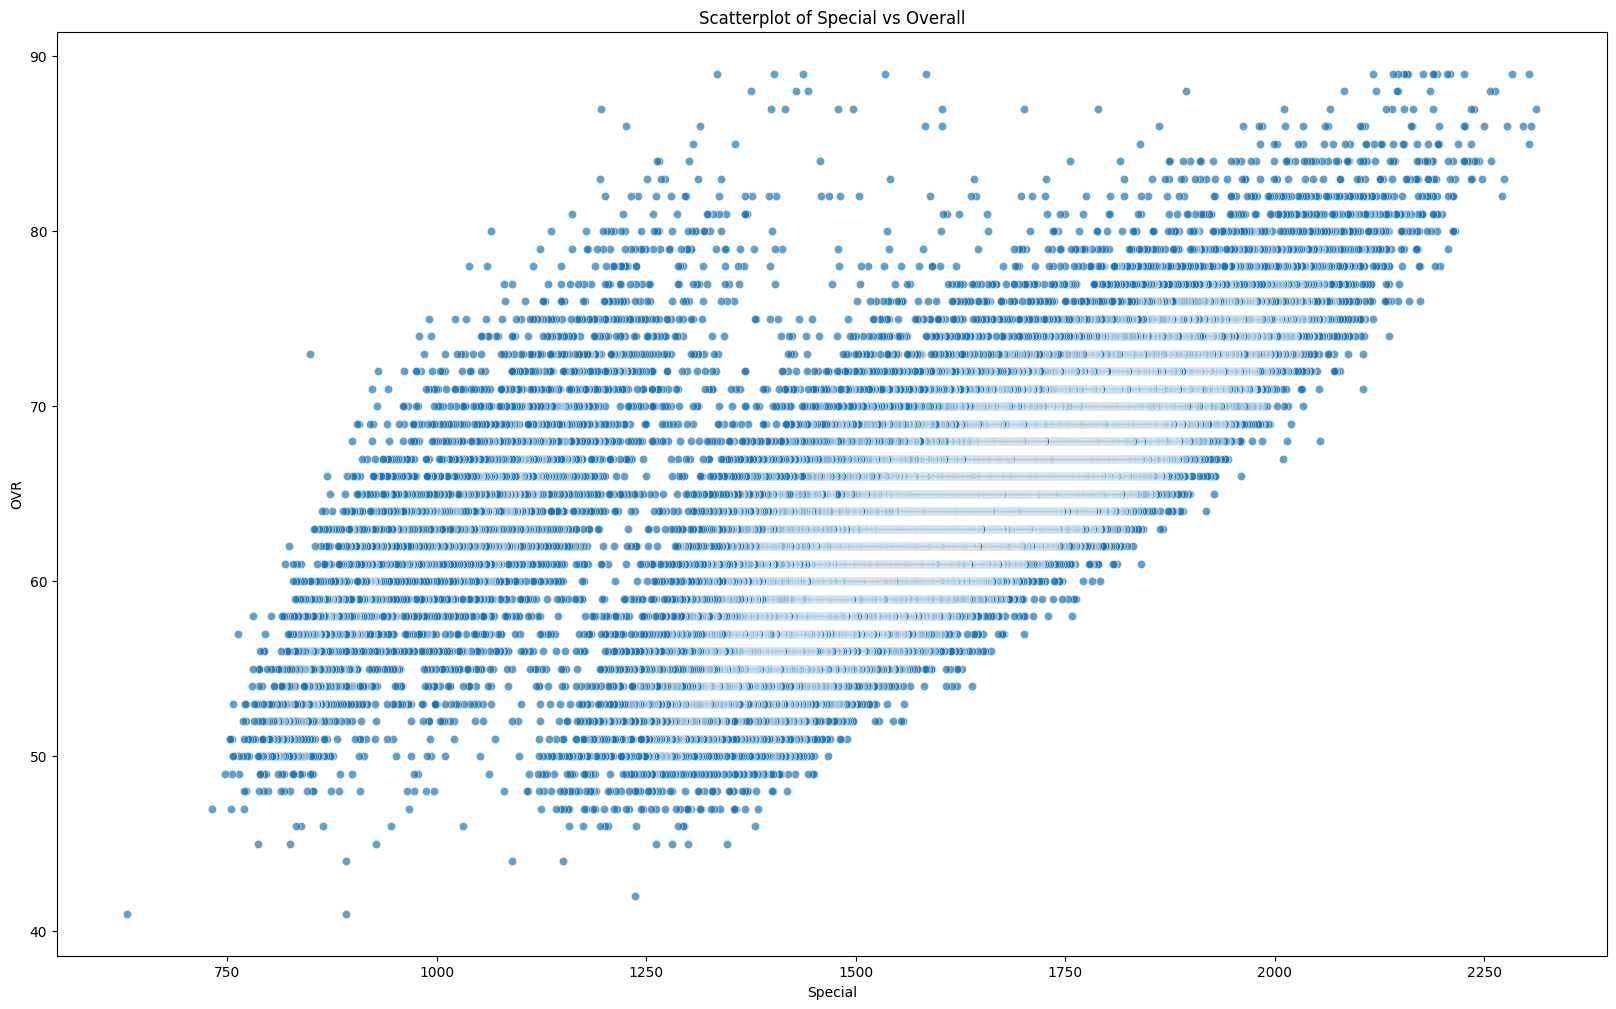

In [158]:
plt.figure(figsize=(20,12))
sns.scatterplot(data=df, x="Special", y="Overall", alpha=0.7)

plt.title("Scatterplot of Special vs Overall")
plt.xlabel("Special")
plt.ylabel("OVR")
plt.show()

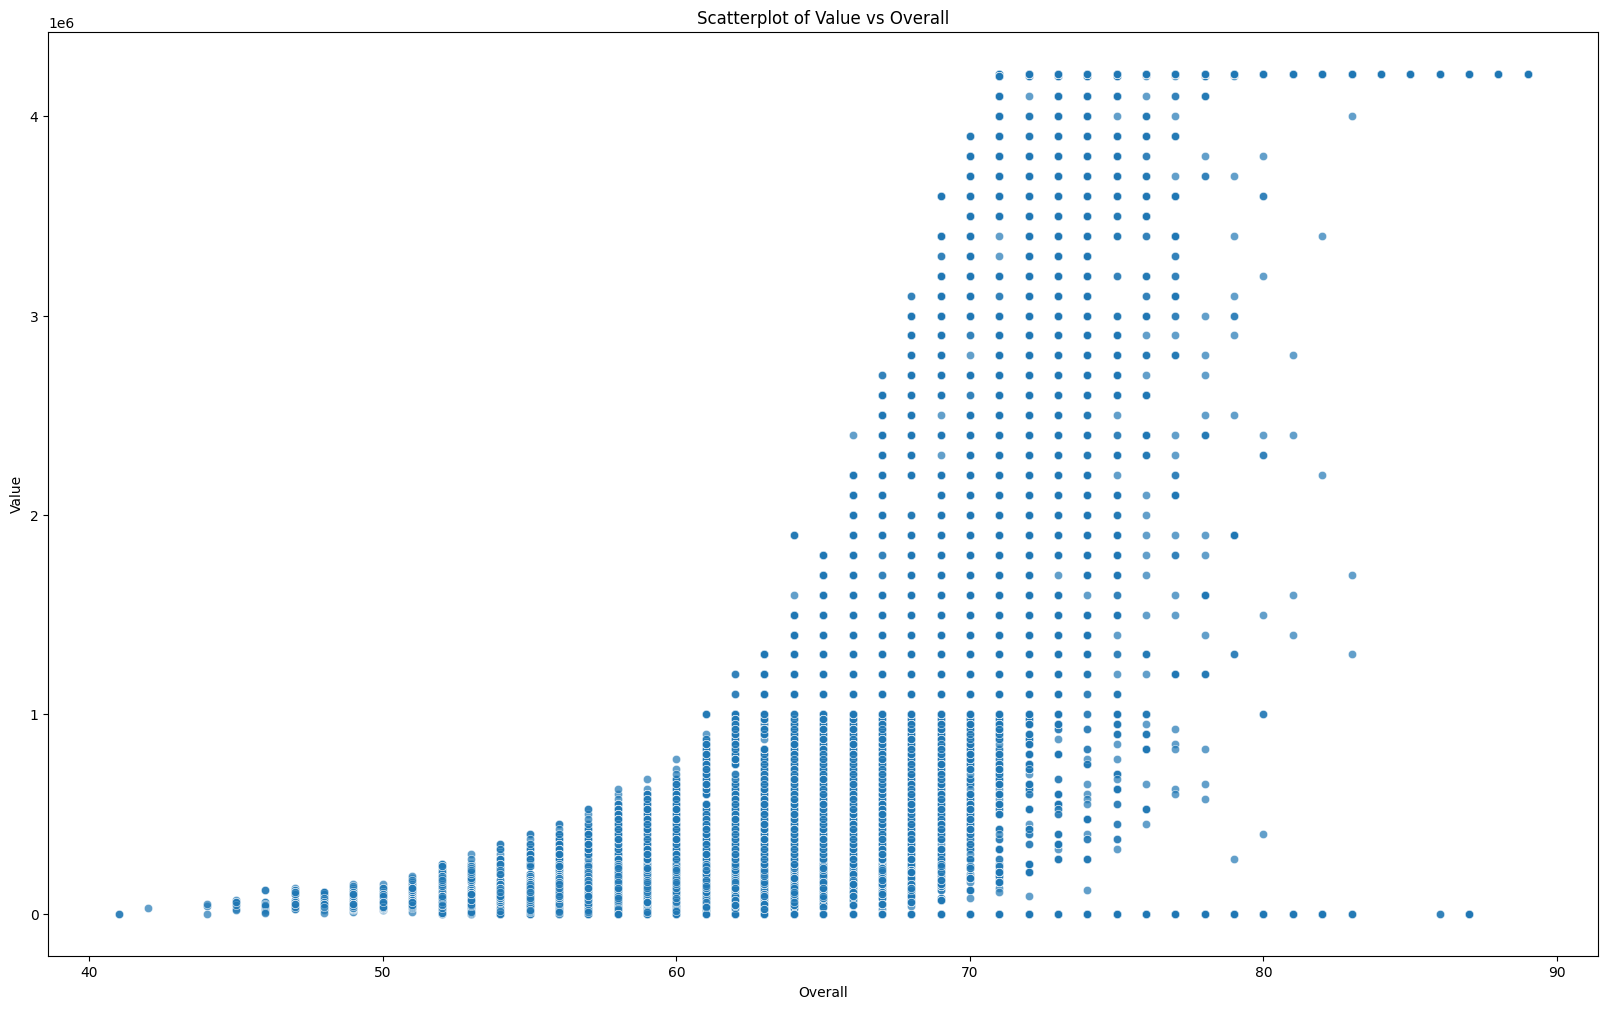

In [159]:
plt.figure(figsize=(20,12))
sns.scatterplot(data=df, x="Overall", y="Value", alpha=0.7)

plt.title("Scatterplot of Value vs Overall")
plt.xlabel("Overall")
plt.ylabel("Value")
plt.show()

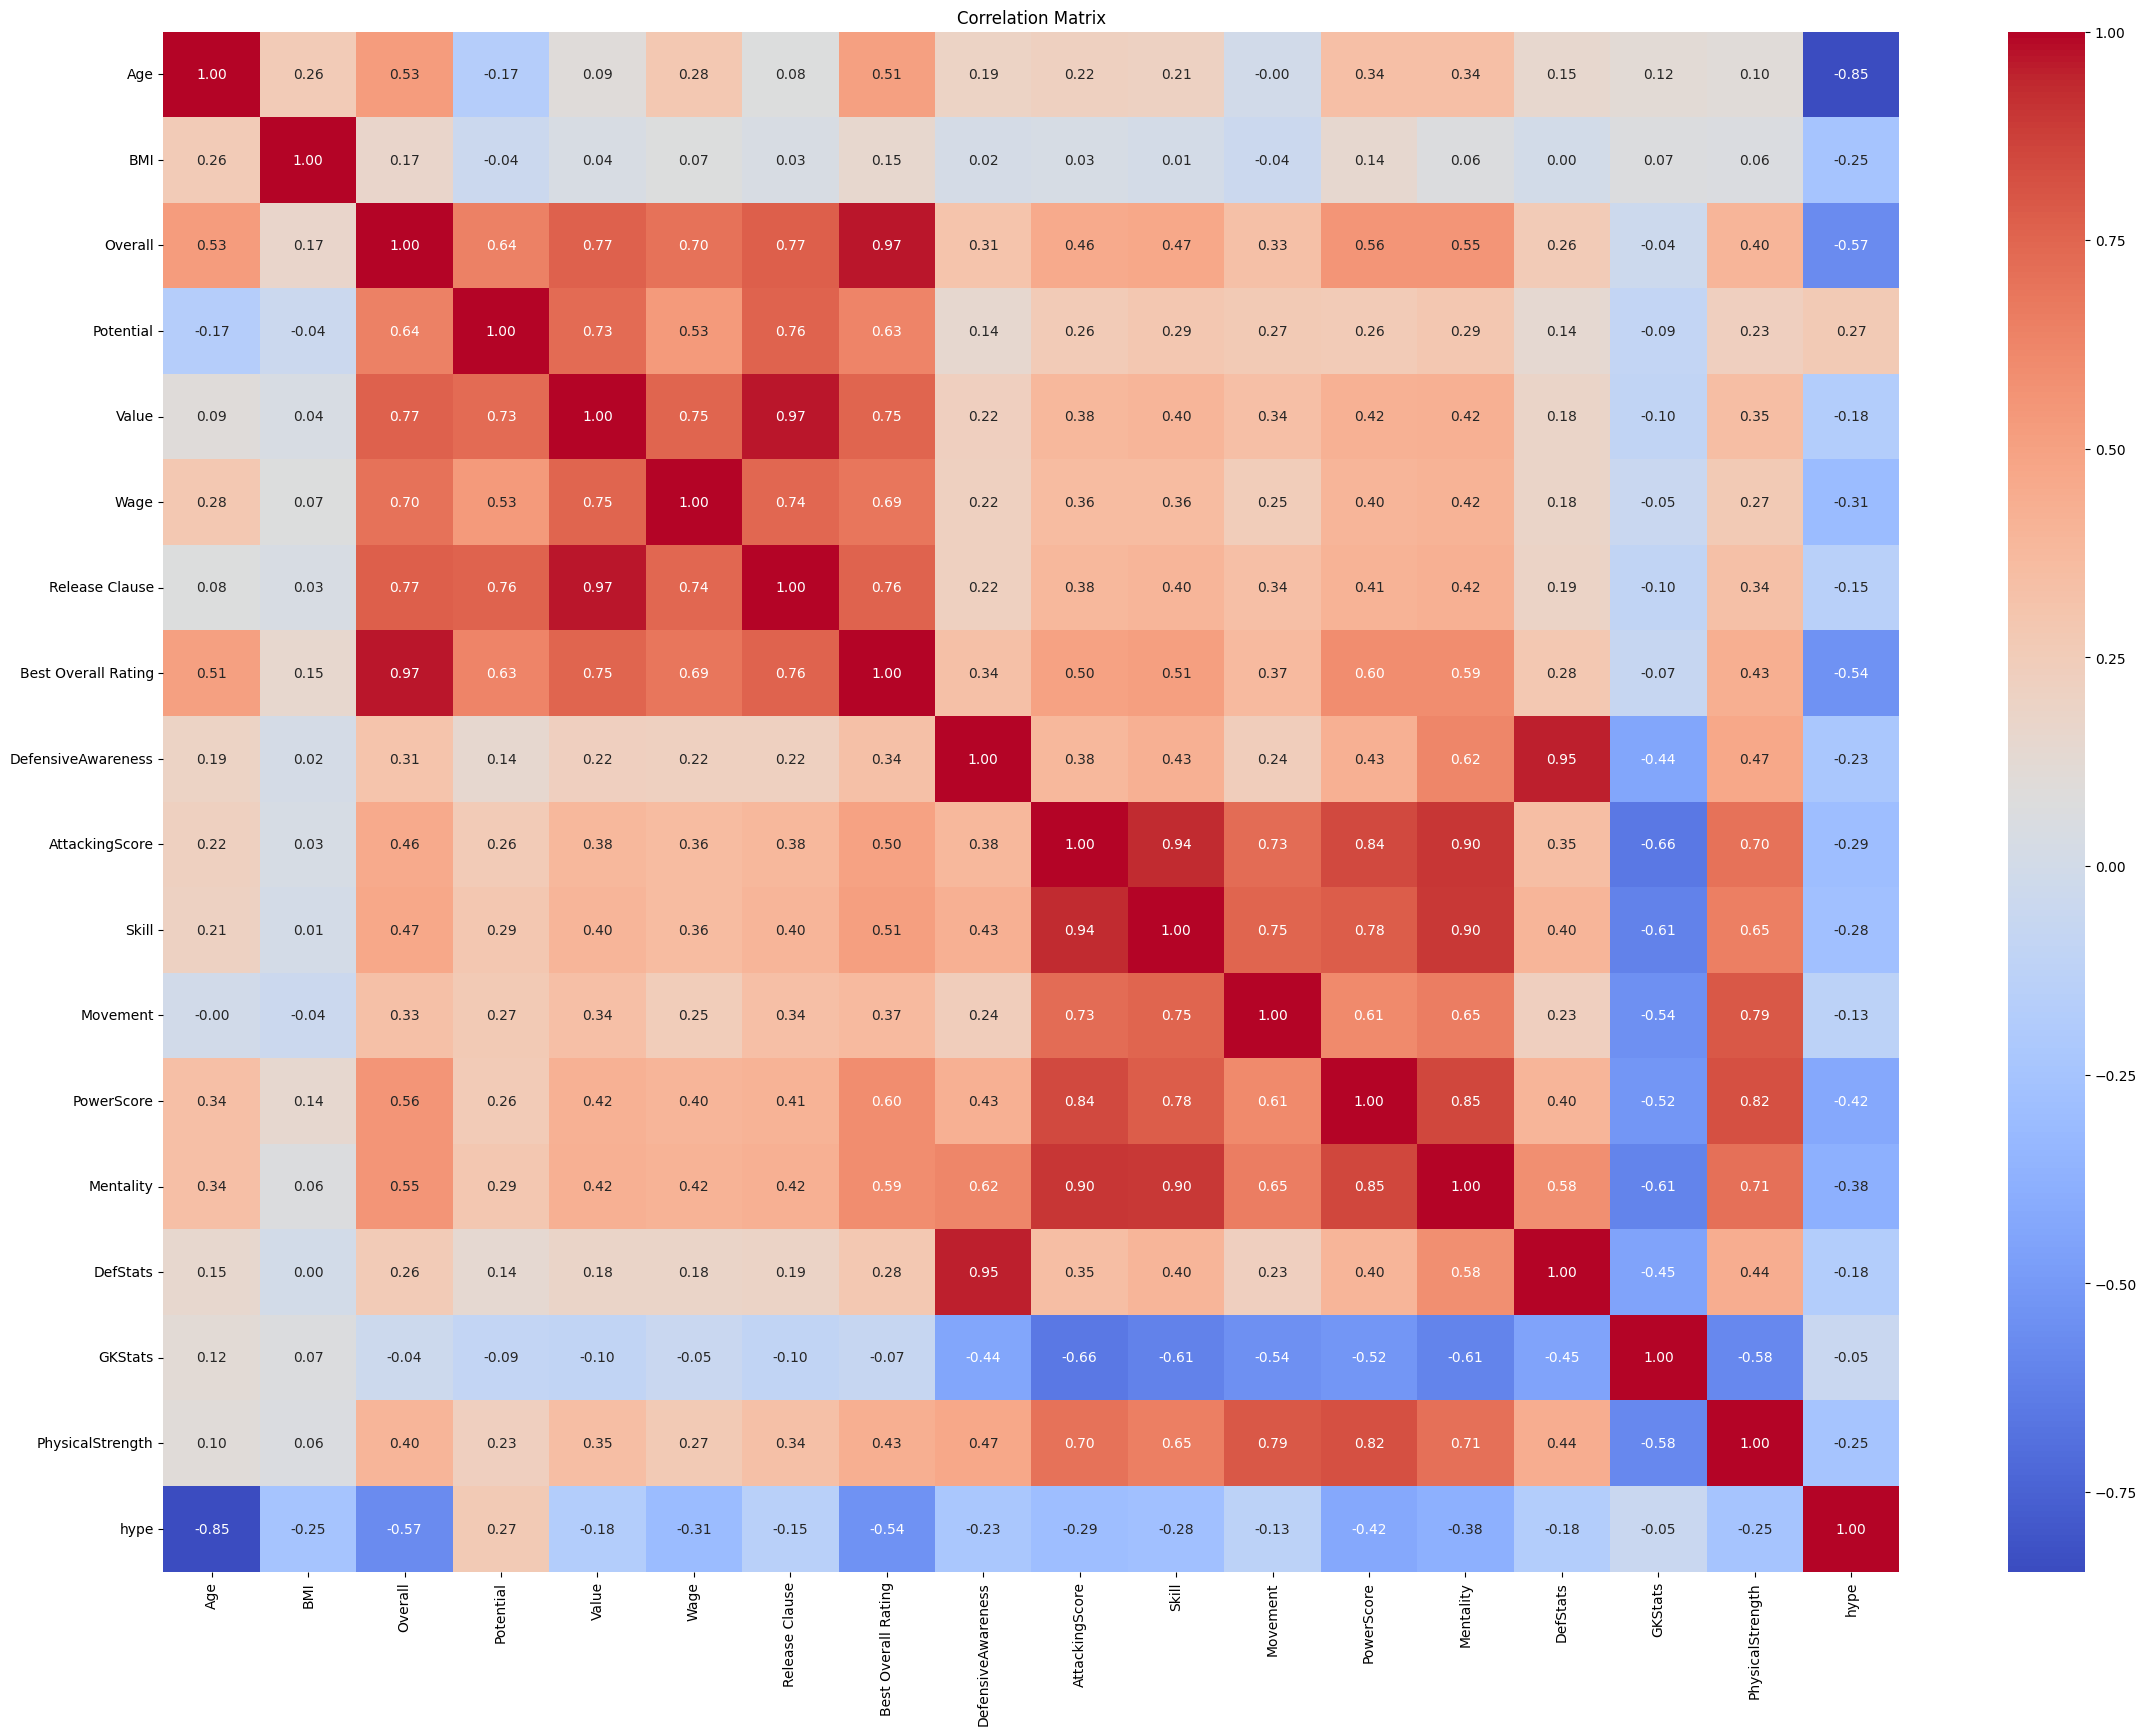

In [160]:
df['hype'] = df['Potential']-df['Overall']
cols =['Age','BMI','Overall', 'Potential', 'Value', 'Wage', 'Release Clause','Best Overall Rating',
        'DefensiveAwareness','AttackingScore','Skill','Movement','PowerScore','Mentality',
       'DefStats','GKStats','PhysicalStrength','hype']
corr = df[cols].corr()

plt.figure(figsize=(28,20))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Target selection and Model Training

In [161]:
y = df['Value']   # target
X = df.drop(['Value','Name','Flag','Photo','Club','Nationality','Club','Club Logo','Real Face','Jersey Number','Joined','Contract Valid Until','Year','ID','hype'], axis=1, errors='ignore')

In [162]:
num_cols = X.select_dtypes(include=['int64','float64']).columns
X[num_cols] = df[num_cols].apply(lambda col: col.fillna(col.median()))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [163]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.001),
    "Random Forest": RandomForestRegressor(n_estimators=300, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results[name] = {"R2": r2, "RMSE": rmse}

results_df = pd.DataFrame(results).T.sort_values(by="R2", ascending=False)
print(results_df)

/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=6.44357e-18): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.618e+15, tolerance: 4.150e+12
  model = cd_fast.enet_coordinate_descent(


                         R2           RMSE
Random Forest      0.983875  153905.805302
Linear Regression  0.914282  354845.647903
Lasso Regression   0.914282  354845.647937
Ridge Regression   0.914282  354845.676606


According to the results Random Forest is the best model with accuracy 0.983 approx

Later visualising the results of Random Forest

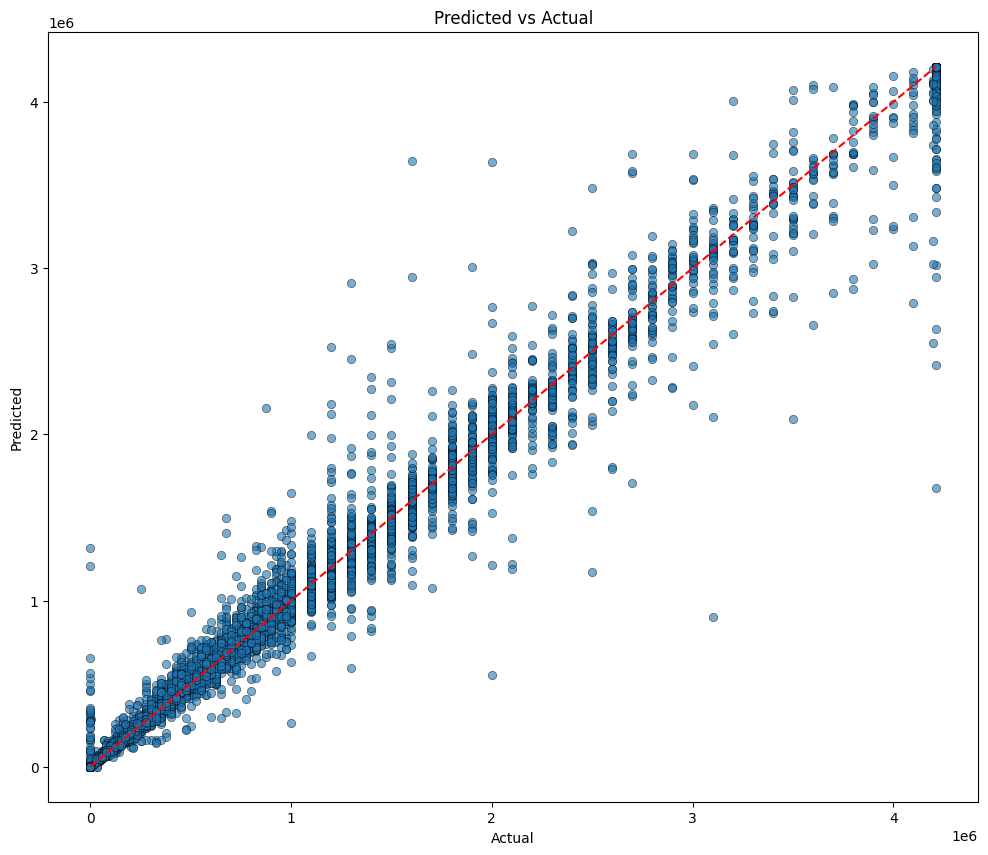

In [164]:
#Scatterplot of predicted vs actual data
plt.figure(figsize=(12,10))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, edgecolor="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual")
plt.show()